In [218]:
import pandas as pd

df = pd.read_excel("paragraphs.xlsx")

In [219]:
df.columns = ['0','1','2']
df = df.drop_duplicates(subset=['2'])

asdfasdfasdfasf

In [242]:
non_string_rows = df[~df['2'].apply(lambda x: isinstance(x, str))]
print(non_string_rows)

           0              1    2
5501  3523.0  New_York_City  NaN


In [249]:
print(df.isnull().sum())
df['2']= df['2'].apply(lambda x: str(x))
df['length'] = df['2'].apply(lambda x: len(x)) 
df = df.sort_values(by='length')


0         0
1         0
2         0
length    0
dtype: int64


In [245]:
rem = [5501,1306]
df.drop(rem,inplace=True)

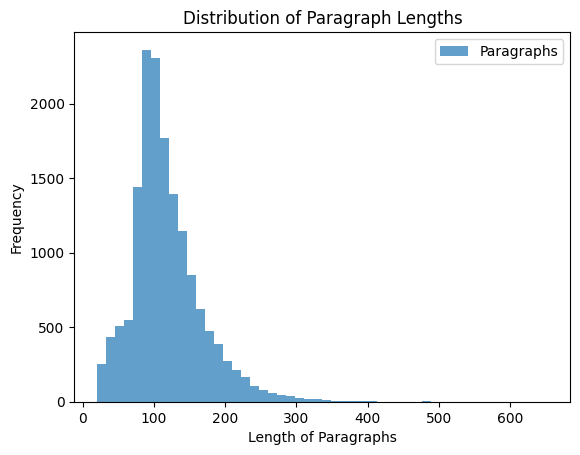

In [250]:
import matplotlib.pyplot as plt

# Histogram of paragraph lengths
plt.hist(df['length'], bins=50, alpha=0.7, label='Paragraphs')
plt.xlabel('Length of Paragraphs')
plt.ylabel('Frequency')
plt.title('Distribution of Paragraph Lengths')
plt.legend()
plt.show()

In [238]:
from nltk.corpus import stopwords
import nltk
import re, string
nltk.download('stopwords')
def preprocess(text):
    text = text.lower()
    text= text.strip()  #get rid of leading/trailing whitespace
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub('', text)  #Replace punctuation with space
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text = re.sub(r'\s+',' ',text)
    return text

def stopword(string):
    words = string.split()
    filtered_words = [word for word in words if word not in stopwords.words('english')]

    return ' '.join(filtered_words)

def finalpreprocess(string):
    return (stopword(preprocess(string)))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\omgup\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\omgup\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [251]:
df['2'] = df['2'].apply(lambda x:finalpreprocess(x))
df.to_csv("processed_inuse.csv")

In [263]:
drf = pd.read_csv("processed_inuse.csv")
rem = [5501,1306]
drf.drop(rem,inplace=True)
drf['length'] = drf['2'].apply(lambda x: len(x)) 
drf = drf.sort_values(by='0')
drf.to_csv("for_bot.csv",index=False)

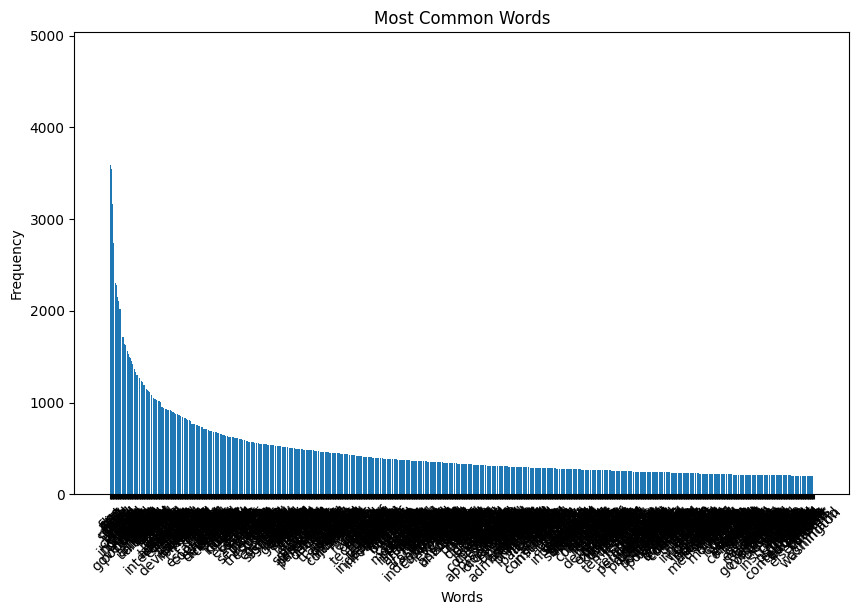

In [309]:
kpt = pd.read_csv('processed_inuse.csv')
import pandas as pd
from collections import Counter
import re
import matplotlib.pyplot as plt

all_text = ' '.join(kpt['2'].tolist())

words = re.findall(r'\b\w+\b', all_text.lower())

word_counts = Counter(words)

most_common_words = word_counts.most_common(1000)

common_words, counts = zip(*most_common_words)

# Plot the most common words using matplotlib
plt.figure(figsize=(10, 6))
plt.bar(common_words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words')
plt.xticks(rotation=45)
plt.show()

# Remove the most common words from the column
common_words_set = set(common_words)
kpt['2'] = kpt['2'].apply(lambda text: ' '.join([word for word in re.findall(r'\b\w+\b', text.lower()) if word not in common_words_set]))

kpt.to_csv("test1.csv")



In [272]:
import pandas as pd
import re

kpt = pd.read_csv('processed_inuse.csv')

all_text = ' '.join(kpt['2'].tolist())

words = re.findall(r'\b\w+\b', all_text.lower())

total_words = len(words)

unique_words = len(set(words))

print(f'Total number of words in the corpus: {total_words}')
print(f'Number of unique words in the corpus: {unique_words}')


Total number of words in the corpus: 1102069
Number of unique words in the corpus: 84799
